In [1]:
import pandas as pd
import numpy as np

In [2]:
# lst_home_india = []
# for i in range(1,6):
#     lst_home_india.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=6;template=results;type=batting;view=innings")  

    
# lst_away_india = []
# for i in range(1,7):
#     lst_away_india.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=6;template=results;type=batting;view=innings")

    
# home_test_india = pd.DataFrame()
# for item in lst_home_india:
#     dum_data = pd.read_html(item)
#     home_test_india = home_test_india.append(dum_data[2])
    
# away_test_india = pd.DataFrame()
# for item in lst_away_india:
#     dum_data = pd.read_html(item)
#     away_test_india = away_test_india.append(dum_data[2])

    
# lst_away_nz = []
# for i in range(1,5):
#     lst_away_nz.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=5;template=results;type=batting;view=innings")

# lst_home_nz = []
# for i in range(1,5):
#     lst_home_nz.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=5;template=results;type=batting;view=innings")

    
# home_test_nz = pd.DataFrame()
# for item in lst_home_nz:
#     dum_data = pd.read_html(item)
#     home_test_nz = home_test_nz.append(dum_data[2])

# away_test_nz = pd.DataFrame()
# for item in lst_away_nz:
#     dum_data = pd.read_html(item)
#     away_test_nz = away_test_nz.append(dum_data[2])


# lst_away_aus = []
# for i in range(1,7):
#     lst_away_aus.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=2;template=results;type=batting;view=innings")

# lst_home_aus = []
# for i in range(1,7):
#     lst_home_aus.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=2;template=results;type=batting;view=innings")
    

# home_test_aus = pd.DataFrame()
# for item in lst_home_aus:
#     dum_data = pd.read_html(item)
#     home_test_aus = home_test_aus.append(dum_data[2])

# away_test_aus = pd.DataFrame()
# for item in lst_away_aus:
#     dum_data = pd.read_html(item)
#     away_test_aus = away_test_aus.append(dum_data[2])

    
# lst_away_eng = []
# for i in range(1,7):
#     lst_away_eng.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=1;template=results;type=batting;view=innings")

# lst_home_eng = []
# for i in range(1,8):
#     lst_home_eng.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=1;template=results;type=batting;view=innings")
    

# home_test_eng = pd.DataFrame()
# for item in lst_home_eng:
#     dum_data = pd.read_html(item)
#     home_test_eng = home_test_eng.append(dum_data[2])

# away_test_eng = pd.DataFrame()
# for item in lst_away_eng:
#     dum_data = pd.read_html(item)
#     away_test_eng = away_test_eng.append(dum_data[2])    

In [3]:
def split_str(sttr,idx):
    s = sttr.split()
    return s[idx]


def stripper(sttr):
    return sttr.rstrip('*')

def preprocess_df(player_names,dataframe,venue):
    
        df = dataframe.query(f"Player == '{player_names}'")


        df['Runs'] = df.Runs.apply(lambda x : stripper(x))    

        cols = ['Runs', 'Mins', 'BF','SR','4s','6s','Inns']
        df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)



        df = df[df['BF'].notna()]


        df.drop(['Unnamed: 8','Unnamed: 12'],axis=1,inplace=True)



        df['Start Date'] = df['Start Date'].apply(lambda x: split_str(x,2))

        df['Opposition'] = df['Opposition'].apply(lambda x: split_str(x,1))


        df.Opposition.replace({'New' : 'New Zealand', 'West': 'West Indies', 'Sri': 'Sri Lanka', 'South':'South Africa'},inplace=True)

        df.fillna(0,inplace=True)
        
        df.rename(columns={'Start Date':'year'},inplace=True)
        
        if venue == "home":
            df['Venue'] = "home"
        else: 
            df['Venue'] = "away"
        
        
        return df
        
    

Option : "V Kohli" , "SPD Smith", "KS Williamson", "JE Root"

In [4]:
# smith_test_home = preprocess_df('SPD Smith',home_test_aus,'home')
# smith_test_away = preprocess_df('SPD Smith',away_test_aus,'')
# kholi_test_home = preprocess_df('V Kohli',home_test_india,'home')
# kholi_test_away = preprocess_df('V Kohli',away_test_india,'')
# williamson_test_home = preprocess_df('KS Williamson',home_test_nz,'home')
# williamson_test_away = preprocess_df('KS Williamson',away_test_nz,'')
# root_test_home = preprocess_df('JE Root',home_test_eng,'home')
# root_test_away = preprocess_df('JE Root',away_test_eng,'')



In [5]:
smith_test_home = pd.read_csv('smith_test_home.csv')
smith_test_away = pd.read_csv('smith_test_away.csv')
kholi_test_home = pd.read_csv('kholi_test_home.csv')
kholi_test_away = pd.read_csv('kholi_test_away.csv')
williamson_test_home = pd.read_csv('williamson_test_home.csv')
williamson_test_away = pd.read_csv('williamson_test_away.csv')
root_test_home = pd.read_csv('root_test_home.csv')
root_test_away = pd.read_csv('root_test_away.csv')

In [6]:
new_df = pd.concat([smith_test_home,smith_test_away,kholi_test_home,kholi_test_away,williamson_test_home,williamson_test_away,
                   root_test_home,root_test_away])

In [7]:
new_df

,Unnamed: 0,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,year,Venue
0,5,SPD Smith,239.0,578.0,399.0,30.0,1.0,59.89,2.0,England,Perth,2017,home
1,10,SPD Smith,192.0,433.0,305.0,15.0,2.0,62.95,1.0,India,Melbourne,2014,home
2,19,SPD Smith,165.0,412.0,246.0,13.0,1.0,67.07,2.0,Pakistan,Melbourne,2016,home
3,21,SPD Smith,162.0,298.0,231.0,21.0,0.0,70.12,1.0,India,Adelaide,2014,home
4,33,SPD Smith,141.0,512.0,326.0,14.0,0.0,43.25,2.0,England,Brisbane,2017,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,70,JE Root,1.0,6.0,4.0,0.0,0.0,25.00,3.0,Bangladesh,Chattogram,2016,away
85,71,JE Root,1.0,4.0,2.0,0.0,0.0,50.00,4.0,Bangladesh,Dhaka,2016,away
86,93,JE Root,1.0,6.0,3.0,0.0,0.0,33.33,4.0,Sri Lanka,Galle,2021,away
87,131,JE Root,0.0,4.0,2.0,0.0,0.0,0.00,3.0,New Zealand,Dunedin,2013,away


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 88
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  585 non-null    int64  
 1   Player      585 non-null    object 
 2   Runs        585 non-null    float64
 3   Mins        585 non-null    float64
 4   BF          585 non-null    float64
 5   4s          585 non-null    float64
 6   6s          585 non-null    float64
 7   SR          585 non-null    float64
 8   Inns        585 non-null    float64
 9   Opposition  585 non-null    object 
 10  Ground      585 non-null    object 
 11  year        585 non-null    int64  
 12  Venue       585 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 64.0+ KB


In [9]:
c= new_df.groupby(['Player','Inns'],as_index=False)['Runs'].agg('sum')
newf = c.pivot(index='Player', columns='Inns')
newf.columns = newf.columns.droplevel()
newf.columns
newf

Inns,1.0,2.0,3.0,4.0
Player,,,,
JE Root,2917.0,2333.0,2334.0,746.0
KS Williamson,1718.0,2336.0,1450.0,665.0
SPD Smith,3536.0,1690.0,1449.0,432.0
V Kohli,2553.0,2658.0,1311.0,968.0


C:\Users\Admin\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


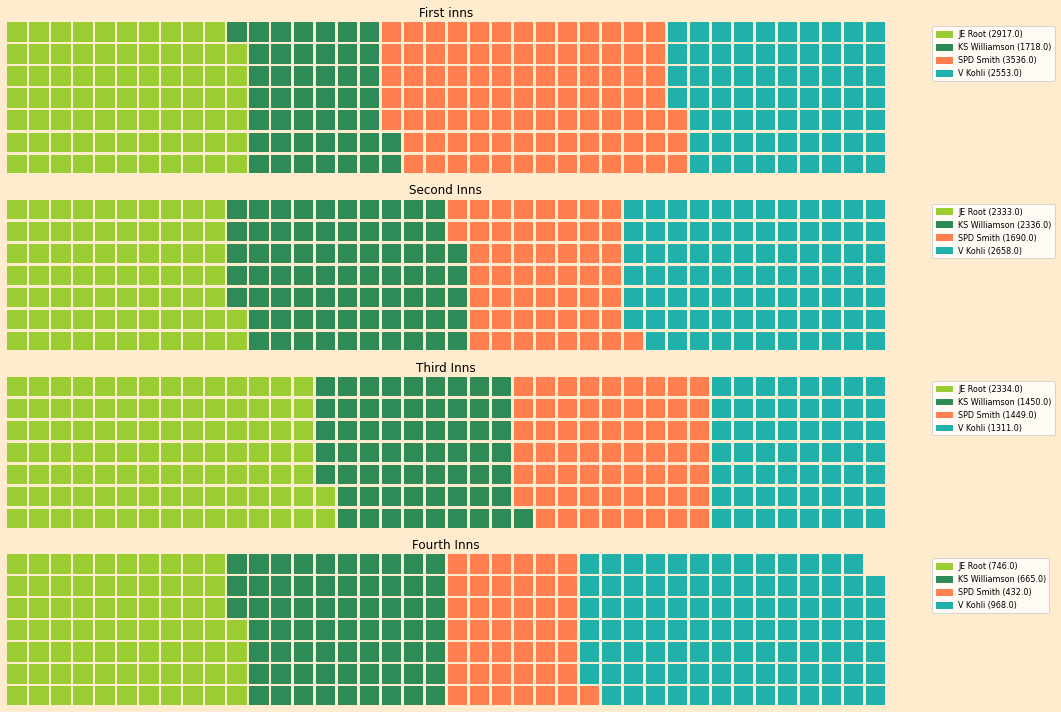

In [10]:
import matplotlib.pyplot as plt
# import pandas as pd
from pywaffle import Waffle
plt.rcParams['figure.facecolor'] = 'blanchedalmond'


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '411': {
            'values': newf[1],
            'labels': [f"{k} ({v})" for k, v in newf[1].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'First inns', 'loc': 'center'}
        },
        '412': {
            'values': newf[2],
            'labels': [f"{k} ({v})" for k, v in newf[2].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Second Inns', 'loc': 'center'}
        },
        '413': {
            'values': newf[3],            
            'labels': [f"{k} ({v})" for k, v in newf[3].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Third Inns', 'loc': 'center'}

        },
        '414': {
            'values': newf[4],
            'labels': [f"{k} ({v})" for k, v in newf[4].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Fourth Inns', 'loc': 'center'}
        },


    },
    rows=7,columns=40,  # outside parameter applied to all subplots
    colors=[ 'yellowgreen', 'seagreen', 'coral', 'lightseagreen'],  # outside parameter applied to all subplots
    figsize=(15,10)
)
plt.show()
# plt.savefig('my.png')

In [90]:
import plotly.express as px
tot_runs= new_df.groupby(['Player'],as_index=False)['Runs'].agg('sum')
tot_runs
fig = px.bar(tot_runs, x="Player", y="Runs", color="Runs", title="Runs Scored",color_continuous_scale=px.colors.sequential.thermal)

fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1000, template = 'simple_white', title_x = 0.5,
                 plot_bgcolor='whitesmoke',paper_bgcolor='whitesmoke')
fig.show()

In [93]:
c = new_df.groupby(['Opposition','Player'],as_index=False)['Runs'].agg('sum')

fig = px.bar(c, x="Player", y="Runs", color="Opposition", title="Runs scored against different oppositions",color_discrete_sequence=px.colors.sequential.thermal)

fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1000, template = 'simple_white',title_x=0.5,
                 plot_bgcolor='whitesmoke',paper_bgcolor='whitesmoke')
fig.show()

In [97]:
d = new_df.groupby(['Player','Inns'],as_index=False)['Runs'].agg('sum')
fig = px.bar(d, x="Player", y="Runs", color="Inns", title="Runs Scored Inns wise",color_discrete_sequence=px.colors.sequential.speed)
# fig.update(layout_coloraxis_showscale=False)
fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1000, template = 'simple_white',title_x=0.5,
                 plot_bgcolor='whitesmoke',paper_bgcolor='whitesmoke')
fig.show()

In [14]:
fig = px.violin(new_df, x="Player", y="Runs", color="Inns",points='all',template= "ggplot2", box=True,
             title="Inns",height=700,width=1000,
             hover_data=["BF"] # add day column to hover data
            )
fig.update_layout(plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')

fig.show()


In [102]:
import plotly.graph_objects as go

pointpos_home = [-0.5,-0.7,-0.5,-1]
pointpos_away = [0.55,0.9,0.75,1]
show_legend = [True,False,False,False]

fig = go.Figure()

# for i in range(0,len(pd.unique(df['day']))):
fig.add_trace(go.Violin(x=smith_test_home.Player,
                        y=smith_test_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[0], # where to position points
                        line_color='lightseagreen',
                        showlegend=True)
         )
fig.add_trace(go.Violin(x=smith_test_away.Player,
                        y=smith_test_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[0],
                        line_color='mediumpurple',
                        showlegend=True)
         )
fig.add_trace(go.Violin(x=kholi_test_home.Player,
                        y=kholi_test_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[1], # where to position points
                        line_color='lightseagreen',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=kholi_test_away.Player,
                        y=kholi_test_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[1],
                        line_color='mediumpurple',
                        showlegend=False)
         )

fig.add_trace(go.Violin(x=williamson_test_home.Player,
                        y=williamson_test_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[2], # where to position points
                        line_color='lightseagreen',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=williamson_test_away.Player,
                        y=williamson_test_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[2],
                        line_color='mediumpurple',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=root_test_home.Player,
                        y=root_test_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[3], # where to position points
                        line_color='lightseagreen',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=root_test_away.Player,
                        y=root_test_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[3],
                        line_color='mediumpurple',
                        showlegend=False)
         )
#plot_bgcolor='papayawhip',paper_bgcolor='papayawhip'
# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count
fig.update_layout( template = 'simple_white',
    title_text="Runs Scored Home/Away",height=700,width=1000,plot_bgcolor='whitesmoke',paper_bgcolor='whitesmoke',
    violingap=0.2, violingroupgap=0, violinmode='overlay')
fig.show()

In [16]:
fig = px.violin(new_df, x="Player", y="Runs", color="Inns",points='all',template= "simple_white", box=True,
             title="Runs Distribution per Inns",height=800,width=1000,
             hover_data=["BF"] # add day column to hover data
            )
fig.update_layout(plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')

fig.show()

In [17]:
def yearwise_runs(data_home,data_away,player_name):
    dataframe = pd.concat([data_home,data_away])
    lst = []
    for i in dataframe.year.unique():
        dum = dataframe.query(f"year == {i}")
        lst.append({i : dum.Runs.sum(), 'average' : dum.Runs.sum()/ len(dum.Runs)})
    
    dum = pd.DataFrame(lst)
    avg = dum.average
    dum.drop('average',axis=1,inplace=True)
    
    dum = pd.Series(np.diag(dum), index=[dum.index, dum.columns])

    dum_1 = pd.DataFrame(dum, columns=['TRuns'])
    dum_1.reset_index(inplace=True)
    dum_1.drop('level_0', axis=1, inplace=True)

    dum_1.rename(columns={"level_1": "Year"},inplace=True)
    dum_1.sort_values('Year',inplace=True)
    dum_1['avg'] = avg
    dum_1['player'] = player_name
    
    
    return dum_1

    

In [18]:
kohli_yearwise = yearwise_runs(kholi_test_home,kholi_test_away,'Kohli')
smith_yearwise = yearwise_runs(smith_test_home,smith_test_away,'Smith' )
willam_yearwise = yearwise_runs(williamson_test_home,williamson_test_away,'Williamson')
root_yearwise = yearwise_runs(root_test_home,root_test_away,'Joe')
df2= {'Year': '2011','TRuns': 0,'avg':0, 'player': "Joe"}
root_yearwise= root_yearwise.append(df2,ignore_index = True)
df3= {'Year': '2011','TRuns': 0,'avg':0, 'player': "Smith"}
df4 = {'Year': '2012','TRuns': 0,'avg':0, 'player': "Smith"}
smith_yearwise=smith_yearwise.append(df3,ignore_index = True)
smith_yearwise=smith_yearwise.append(df4,ignore_index = True)
root_yearwise['Year'] = root_yearwise['Year'].astype('int')
smith_yearwise['Year'] = smith_yearwise['Year'].astype('int')
root_yearwise.sort_values('Year',inplace=True)
smith_yearwise.sort_values('Year',inplace=True)

In [19]:
all_players_yearwise = pd.concat([kohli_yearwise,smith_yearwise,willam_yearwise,root_yearwise])

In [20]:
all_players_yearwise

,Year,TRuns,avg,player
8,2011,202.0,22.444444,Kohli
5,2012,689.0,43.062500,Kohli
4,2013,616.0,51.333333,Kohli
9,2014,847.0,42.350000,Kohli
6,2015,640.0,42.666667,Kohli
2,2016,1215.0,67.500000,Kohli
1,2017,1059.0,66.187500,Kohli
3,2018,1322.0,55.083333,Kohli
0,2019,612.0,55.636364,Kohli
10,2020,116.0,19.333333,Kohli


aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, wh

In [21]:
import plotly.graph_objects as go
import numpy as np

title = 'Comparision b/w fab 4'
labels = ["Kohli" , "Smith", "Williamson", "Joe"]
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]


fig = go.Figure()


fig.add_trace(go.Scatter(x=willam_yearwise.Year, y=willam_yearwise.TRuns, mode='lines',
    name="Williamson",
    line=dict(color='hotpink', width=2),
    connectgaps=True,
))

fig.add_trace(go.Scatter(x=smith_yearwise.Year, y=smith_yearwise.TRuns, mode='lines',
    name="Smith",
    line=dict(color='mediumblue', width=2),
    connectgaps=True,
))

fig.add_trace(go.Scatter(x=root_yearwise.Year, y=root_yearwise.TRuns, mode='lines',
    name="Joe",
    line=dict(color='lime', width=line_size[3]),
    connectgaps=True,
))
fig.add_trace(go.Scatter(x=kohli_yearwise.Year, y=kohli_yearwise.TRuns, mode='lines',
    name="Kohli",
    line=dict(color='darkmagenta', width=2),
    connectgaps=True,
))




fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=True,
#     plot_bgcolor='white'
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
    plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond',
)



fig.show()

In [22]:
fig = px.bar(all_players_yearwise, x="Year", y="TRuns", color="player", title="Long-Form Input")

fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1400, template = 'ggplot2',
                 plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')
fig.show()

In [23]:
list(all_players_yearwise[all_players_yearwise.player =='Kohli'].TRuns)

[202.0,
 689.0,
 616.0,
 847.0,
 640.0,
 1215.0,
 1059.0,
 1322.0,
 612.0,
 116.0,
 172.0]

In [24]:
list(all_players_yearwise.Year.unique())

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [25]:
j =list(all_players_yearwise[all_players_yearwise.player =="Joe"].TRuns)

In [26]:
j

[0.0, 93.0, 862.0, 777.0, 1098.0, 1477.0, 966.0, 948.0, 851.0, 464.0, 794.0]

In [27]:
k = list(all_players_yearwise[all_players_yearwise.player =="Kohli"].TRuns)

In [28]:
kane = list(all_players_yearwise[all_players_yearwise.player =="Williamson"].TRuns)

In [29]:
kane

[189.0, 559.0, 747.0, 668.0, 1172.0, 753.0, 566.0, 265.0, 514.0, 498.0, 238.0]

In [30]:
s = list(all_players_yearwise[all_players_yearwise.player =="Smith"].TRuns)

In [31]:
s

[0.0, 0.0, 711.0, 972.0, 1474.0, 1079.0, 1305.0, 225.0, 965.0, 73.0, 303.0]

In [32]:
k

[202.0,
 689.0,
 616.0,
 847.0,
 640.0,
 1215.0,
 1059.0,
 1322.0,
 612.0,
 116.0,
 172.0]

In [33]:
jk = []
jk.append(j)
jk.append(k)
print(jk)

[[0.0, 93.0, 862.0, 777.0, 1098.0, 1477.0, 966.0, 948.0, 851.0, 464.0, 794.0], [202.0, 689.0, 616.0, 847.0, 640.0, 1215.0, 1059.0, 1322.0, 612.0, 116.0, 172.0]]


In [34]:
l1= [list(all_players_yearwise[all_players_yearwise.player =="Kohli"].TRuns), 
     list(all_players_yearwise[all_players_yearwise.player =="Joe"].TRuns),
     list(all_players_yearwise[all_players_yearwise.player =="Williamson"].TRuns),
     list(all_players_yearwise[all_players_yearwise.player =="Smith"].TRuns)]
print(np.transpose(l1))

[[ 202.    0.  189.    0.]
 [ 689.   93.  559.    0.]
 [ 616.  862.  747.  711.]
 [ 847.  777.  668.  972.]
 [ 640. 1098. 1172. 1474.]
 [1215. 1477.  753. 1079.]
 [1059.  966.  566. 1305.]
 [1322.  948.  265.  225.]
 [ 612.  851.  514.  965.]
 [ 116.  464.  498.   73.]
 [ 172.  794.  238.  303.]]


In [35]:
frame = { 'Joe': j, 'Kohli': k , 'Williamson' : kane , 'Smith': s}
  
result = pd.DataFrame(frame)
  

In [36]:
result.shape

(11, 4)

In [37]:
waff = result.T

waff.columns = ['2011','2012', '2013','2014','2015','2016','2017','2018','2019','2020','2021']

In [38]:
waff

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Joe,0.0,93.0,862.0,777.0,1098.0,1477.0,966.0,948.0,851.0,464.0,794.0
Kohli,202.0,689.0,616.0,847.0,640.0,1215.0,1059.0,1322.0,612.0,116.0,172.0
Williamson,189.0,559.0,747.0,668.0,1172.0,753.0,566.0,265.0,514.0,498.0,238.0
Smith,0.0,0.0,711.0,972.0,1474.0,1079.0,1305.0,225.0,965.0,73.0,303.0


In [39]:
[[ 202 ,   0. , 189. ,   0.],
 [ 689. ,  93. , 559.  ,  0.],
 [ 616.,  862. , 747.,  711.],
 [ 847. , 777.,  668. , 972.],
 [ 640., 1098., 1172. ,1474.],
 [1215., 1477. , 753., 1079.],
 [1059.,  966. , 566., 1305.],
 [1322. , 948. , 265.,  225.],
 [ 612. , 851. , 514.,  965.],
 [ 116.,  464.,  498.  , 73.],
 [ 172.,  794. , 238. , 303.]]

[[202, 0.0, 189.0, 0.0],
 [689.0, 93.0, 559.0, 0.0],
 [616.0, 862.0, 747.0, 711.0],
 [847.0, 777.0, 668.0, 972.0],
 [640.0, 1098.0, 1172.0, 1474.0],
 [1215.0, 1477.0, 753.0, 1079.0],
 [1059.0, 966.0, 566.0, 1305.0],
 [1322.0, 948.0, 265.0, 225.0],
 [612.0, 851.0, 514.0, 965.0],
 [116.0, 464.0, 498.0, 73.0],
 [172.0, 794.0, 238.0, 303.0]]

aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [103]:
top_labels = ["Kohli",'Joe','Kane','Smith']

colors = [ 'yellowgreen', 'seagreen', 'coral', 'lightseagreen']

x_data = [[ 202 ,   0. , 189. ,   0.],
 [ 689. ,  93. , 559.  ,  0.],
 [ 616.,  862. , 747.,  711.],
 [ 847. , 777.,  668. , 972.],
 [ 640., 1098., 1172. ,1474.],
 [1215., 1477. , 753., 1079.],
 [1059.,  966. , 566., 1305.],
 [1322. , 948. , 265.,  225.],
 [ 612. , 851. , 514.,  965.],
 [ 116.,  464.,  498.  , 73.],
 [ 172.,  794. , 238. , 303.]]
          

y_data = ['2011','2012', '2013','2014','2015','2016','2017','2018','2019','2020','2021']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=3), opacity=0.7
            )
        ))
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='whitesmoke',
    plot_bgcolor='whitesmoke',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
    height=700,width=1000,template='simple_white',
)
annotations = []

for yd, xd in zip(y_data, x_data):

    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text='<b>'+top_labels[0]+'</b>',
                                font=dict(family='Droid Serif, serif', size=16,
                                          color='yellowgreen'),
                                showarrow=False))
    
    space = xd[0]
    for i in range(1, len(xd)):

            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text='<b>'+top_labels[i]+'</b>',
                                        font=dict(family='Droid Serif, serif', size=16,
                                                  color=colors[i]),
                                        showarrow=False))
            space += xd[i]
fig.update_layout(annotations=annotations)

fig.show()

C:\Users\Admin\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



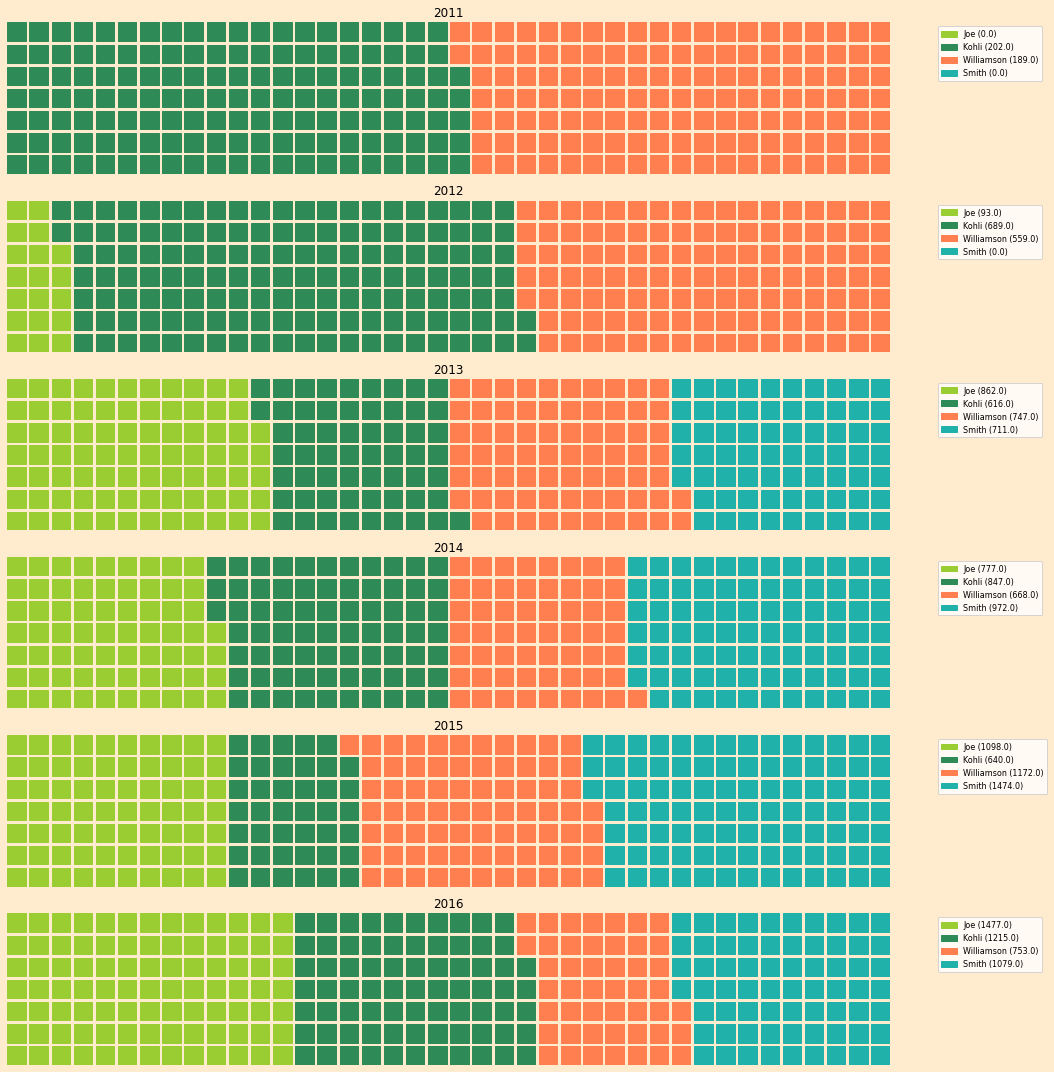

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from pywaffle import Waffle
plt.rcParams['figure.facecolor'] = 'blanchedalmond'


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '611': {
            'values': waff['2011'],
            'labels': [f"{k} ({v})" for k, v in waff['2011'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2011', 'loc': 'center'}
        },
        '612': {
            'values': waff['2012'],
            'labels': [f"{k} ({v})" for k, v in waff['2012'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2012', 'loc': 'center'}
        },
        '613': {
            'values': waff['2013'],#             
            'labels': [f"{k} ({v})" for k, v in waff['2013'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2013', 'loc': 'center'}

        },
        '614': {
            'values': waff['2014'],
            'labels': [f"{k} ({v})" for k, v in waff['2014'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2014', 'loc': 'center'}
        },
        '615': {
            'values': waff['2015'],
            'labels': [f"{k} ({v})" for k, v in waff['2015'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2015', 'loc': 'center'}
        },
        '616': {
            'values': waff['2016'],
            'labels': [f"{k} ({v})" for k, v in waff['2016'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2016', 'loc': 'center'}
        },

    },
    rows=7,columns=40,  # outside parameter applied to all subplots
    colors=[ 'yellowgreen', 'seagreen', 'coral', 'lightseagreen'],  # outside parameter applied to all subplots
    figsize=(25,15)
)
plt.show()

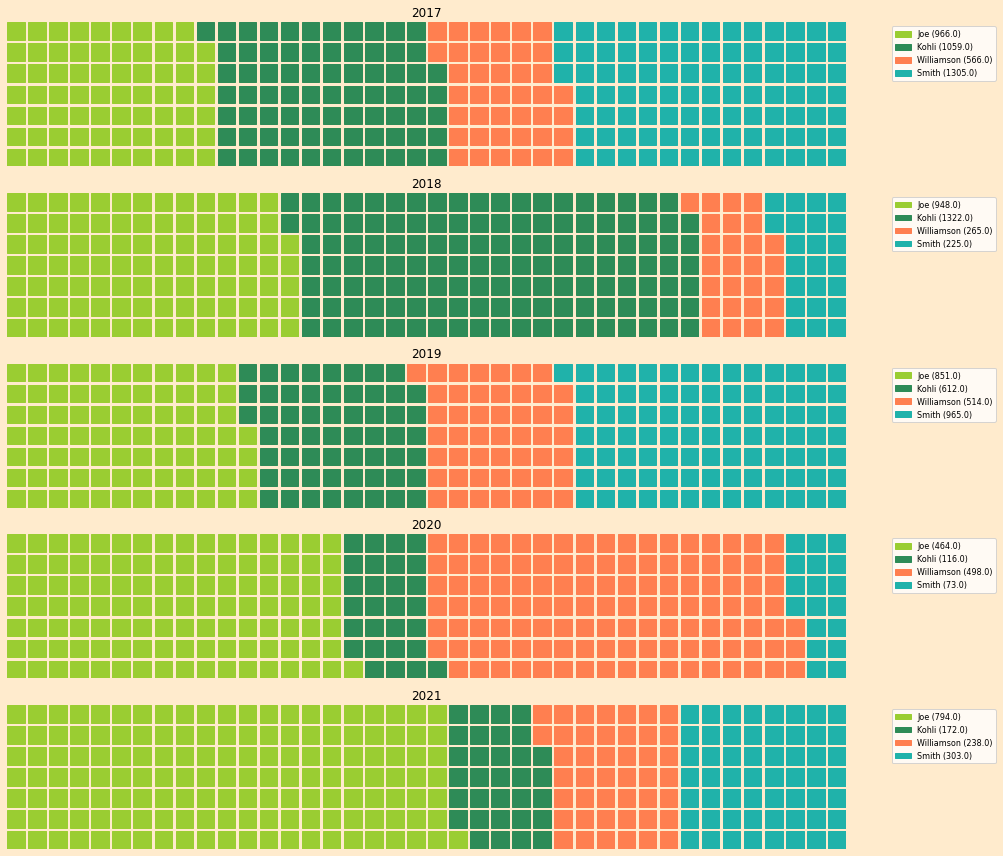

In [42]:


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '511': {
            'values': waff['2017'],
            'labels': [f"{k} ({v})" for k, v in waff['2017'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2017', 'loc': 'center'}
        },
        '512': {
            'values': waff['2018'],
            'labels': [f"{k} ({v})" for k, v in waff['2018'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2018', 'loc': 'center'}
        },
        '513': {
            'values': waff['2019'],#             
            'labels': [f"{k} ({v})" for k, v in waff['2019'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2019', 'loc': 'center'}

        },
        '514': {
            'values': waff['2020'],
            'labels': [f"{k} ({v})" for k, v in waff['2020'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2020', 'loc': 'center'}
        },
        '515': {
            'values': waff['2021'],
            'labels': [f"{k} ({v})" for k, v in waff['2021'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2021', 'loc': 'center'}
        },


    },
    rows=7,columns=40,  # outside parameter applied to all subplots
    colors=[ 'yellowgreen', 'seagreen', 'coral', 'lightseagreen'],  # outside parameter applied to all subplots
    figsize=(50, 12)
)
plt.show()

In [43]:
overall_df = pd.read_html('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;home_or_away=1;home_or_away=2;spanmax1=19+May+2021;spanmin1=19+May+2011;spanval1=span;template=results;type=batting')

In [44]:
overall_df = overall_df[2]
players =  ["V Kohli",'JE Root','KS Williamson','SPD Smith']

In [45]:
players =  ["V Kohli",'JE Root','KS Williamson','SPD Smith']
overall_df.Player


0               JE Root (ENG)
1             V Kohli (INDIA)
2             SPD Smith (AUS)
3             DA Warner (AUS)
4               AN Cook (ENG)
5          KS Williamson (NZ)
6           CA Pujara (INDIA)
7                HM Amla (SA)
8             AD Mathews (SL)
9            LRPL Taylor (NZ)
10       FDM Karunaratne (SL)
11          AM Rahane (INDIA)
12            BA Stokes (ENG)
13               D Elgar (SA)
14          F du Plessis (SA)
15          JM Bairstow (ENG)
16            MJ Clarke (AUS)
17          LD Chandimal (SL)
18         KC Brathwaite (WI)
19        AB de Villiers (SA)
20            Azhar Ali (PAK)
21            TWM Latham (NZ)
22    Mushfiqur Rahim (BDESH)
23         KC Sangakkara (SL)
24            M Vijay (INDIA)
25        Tamim Iqbal (BDESH)
26              IR Bell (ENG)
27            BJ Watling (NZ)
28      Mominul Haque (BDESH)
29              DM Bravo (WI)
30             Q de Kock (SA)
31            BKG Mendis (SL)
32    Shakib Al Hasan (BDESH)
33        

In [46]:
li =  ["V Kohli (INDIA)",'JE Root (ENG)','KS Williamson (NZ)','SPD Smith (AUS)']
  
overall_df =overall_df[overall_df.Player.isin(li)]
overall_df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,JE Root (ENG),2012-2021,100,183,13,8330,254,49.00,15154,54.96,20,46,8,924,25,NaN
1,V Kohli (INDIA),2011-2021,91,153,10,7490,254*,52.37,13112,57.12,27,25,12,839,22,NaN
2,SPD Smith (AUS),2013-2021,70,125,16,7107,239,65.20,12795,55.54,27,27,4,790,41,NaN
5,KS Williamson (NZ),2011-2021,72,124,12,6169,251,55.08,11806,52.25,21,28,8,692,16,NaN


In [47]:
overall_df['MRA'] = (overall_df['100'] + overall_df['50']) / overall_df.Inns
overall_df['conversion_rate'] = (overall_df['100'] / (overall_df['100']+overall_df['50']))*100
overall_df['tot_milestones'] = overall_df['100'] + overall_df['50']

In [48]:
overall_df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15,MRA,conversion_rate,tot_milestones
0,JE Root (ENG),2012-2021,100,183,13,8330,254,49.00,15154,54.96,20,46,8,924,25,NaN,0.360656,30.303030,66
1,V Kohli (INDIA),2011-2021,91,153,10,7490,254*,52.37,13112,57.12,27,25,12,839,22,NaN,0.339869,51.923077,52
2,SPD Smith (AUS),2013-2021,70,125,16,7107,239,65.20,12795,55.54,27,27,4,790,41,NaN,0.432000,50.000000,54
5,KS Williamson (NZ),2011-2021,72,124,12,6169,251,55.08,11806,52.25,21,28,8,692,16,NaN,0.395161,42.857143,49


In [99]:

fig = px.bar(overall_df, x='Player', y='Runs', color='Runs',color_continuous_scale=px.colors.sequential.thermal,
             hover_data=['NO','SR','HS'])
fig.add_trace(go.Scatter(x=overall_df.Player, y=overall_df.BF/1.5, 
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=overall_df.Player, y=overall_df.Ave*100,
                    line_shape='linear'))

fig.add_annotation(
        x=2,
        y=10000,
        xref="x",
        yref="y",
        text='<b>'+'Average*100'+'</b>',
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="green"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="blanchedalmond",
        opacity=0.8
        )
fig.add_annotation(
        x=2,
        y=9500,
        xref="x",
        yref="y",
        text='<b>'+'Balls faced / 1.5'+'</b>',
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="blanchedalmond",
        opacity=0.8
        )


fig.update_layout(
    showlegend=False,height=600,width=1000,template='simple_white',
    plot_bgcolor="white",
    paper_bgcolor='white',
    margin=dict(t=10,l=10,b=10,r=10)
)
fig.show()

In [115]:
fig = px.bar(overall_df, x='Player', y='conversion_rate', color='tot_milestones',color_continuous_scale=px.colors.sequential.thermal)
fig.add_trace(go.Scatter(x=overall_df.Player, y=overall_df.MRA*100, 
                    line_shape='linear'))
fig.add_annotation(
        x=2,
        y=70,
        xref="x",
        yref="y",
        text='<b>'+'MRA*100'+'</b>',
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="blanchedalmond",
        opacity=0.8
        )
fig.update_layout(title='Conversion Rate',title_x=0.5,
    template='simple_white',
    plot_bgcolor="whitesmoke",
    paper_bgcolor='whitesmoke',
)
fig.show()

In [51]:
# odi_home_india = []
# for i in range(1,5):
#     odi_home_india.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=6;template=results;type=batting;view=innings")  

    
# odi_away_india = []
# for i in range(1,6):
#     odi_away_india.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=6;template=results;type=batting;view=innings")


# home_odi_india = pd.DataFrame()
# for item in odi_home_india:
#     dum_data = pd.read_html(item)
#     home_odi_india = home_odi_india.append(dum_data[2])
    
# away_odi_india = pd.DataFrame()
# for item in odi_away_india:
#     dum_data = pd.read_html(item)
#     away_odi_india = away_odi_india.append(dum_data[2])
    
    
# odi_away_nz = []
# for i in range(1,3):
#     odi_away_nz.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=5;template=results;type=batting;view=innings")

# odi_home_nz = []
# for i in range(1,5):
#     odi_home_nz.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=5;template=results;type=batting;view=innings")

    
# home_odi_nz = pd.DataFrame()
# for item in odi_home_nz:
#     dum_data = pd.read_html(item)
#     home_odi_nz = home_odi_nz.append(dum_data[2])

# away_odi_nz = pd.DataFrame()
# for item in odi_away_nz:
#     dum_data = pd.read_html(item)
#     away_odi_nz = away_odi_nz.append(dum_data[2])


# odi_away_aus = []
# for i in range(1,5):
#     odi_away_aus.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=2;template=results;type=batting;view=innings")
# odi_home_aus = []
# for i in range(1,4):
#     odi_home_aus.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=2;template=results;type=batting;view=innings")
    

# home_odi_aus = pd.DataFrame()
# for item in odi_home_aus:
#     dum_data = pd.read_html(item)
#     home_odi_aus = home_odi_aus.append(dum_data[2])

# away_odi_aus = pd.DataFrame()
# for item in odi_away_aus:
#     dum_data = pd.read_html(item)
#     away_odi_aus = away_odi_aus.append(dum_data[2])

    
# odi_away_eng = []
# for i in range(1,5):
#     odi_away_eng.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=2;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=1;template=results;type=batting;view=innings")

# odi_home_eng = []
# for i in range(1,6):
#     odi_home_eng.append(f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=1;orderby=batted_score;page={i};size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;team=1;template=results;type=batting;view=innings")
    

# home_odi_eng = pd.DataFrame()
# for item in odi_home_eng:
#     dum_data = pd.read_html(item)
#     home_odi_eng = home_odi_eng.append(dum_data[2])

# away_odi_eng = pd.DataFrame()
# for item in odi_away_eng:
#     dum_data = pd.read_html(item)
#     away_odi_eng = away_odi_eng.append(dum_data[2]) 

In [52]:
# smith_odi_home = preprocess_df('SPD Smith',home_odi_aus,'home')
# smith_odi_away = preprocess_df('SPD Smith',away_odi_aus,'')
# kohli_odi_home = preprocess_df('V Kohli',home_odi_india,'home')
# kohli_odi_away = preprocess_df('V Kohli',away_odi_india,'')
# williamson_odi_home = preprocess_df('KS Williamson',home_odi_nz,'home')

# williamson_odi_away = preprocess_df('KS Williamson',away_odi_nz,'')
# root_odi_home = preprocess_df('JE Root',home_odi_eng,'home')
# root_odi_away = preprocess_df('JE Root',away_odi_eng,'')


# smith_odi_home.to_csv('smith_odi_home.csv')
# smith_odi_away.to_csv('smith_odi_away.csv')
# kholi_odi_home.to_csv('kholi_odi_home.csv')
# kholi_odi_away.to_csv('kholi_odi_away.csv')
# williamson_odi_home.to_csv('williamson_odi_home.csv')
# williamson_odi_away.to_csv('williamson_odi_away.csv')
# root_odi_home.to_csv('root_odi_home.csv')
# root_odi_away.to_csv('root_odi_away.csv')


In [53]:
smith_odi_home = pd.read_csv('smith_odi_home.csv')
smith_odi_away = pd.read_csv('smith_odi_away.csv')
kholi_odi_home = pd.read_csv('kholi_odi_home.csv')
kholi_odi_away = pd.read_csv('kholi_odi_away.csv')
williamson_odi_home = pd.read_csv('williamson_odi_home.csv')
williamson_odi_away = pd.read_csv('williamson_odi_away.csv')
root_odi_home = pd.read_csv('root_odi_home.csv')
root_odi_away = pd.read_csv('root_odi_away.csv')


In [54]:
odi_df = pd.concat([smith_odi_home,smith_odi_away,kholi_odi_home,kholi_odi_away,williamson_odi_home,williamson_odi_away,
                   root_odi_home,root_odi_away])

In [55]:
odi_df

,Unnamed: 0,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,year,Venue
0,2,SPD Smith,164.0,206.0,157.0,14.0,4.0,104.45,1.0,New Zealand,Sydney,2016,home
1,5,SPD Smith,149.0,179.0,135.0,11.0,2.0,110.37,2.0,India,Perth,2016,home
2,23,SPD Smith,108.0,157.0,104.0,11.0,1.0,103.84,2.0,Pakistan,Perth,2017,home
3,29,SPD Smith,105.0,121.0,93.0,11.0,2.0,112.90,1.0,India,Sydney,2015,home
4,30,SPD Smith,105.0,0.0,66.0,11.0,4.0,159.09,1.0,India,Sydney,2020,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,132,JE Root,3.0,25.0,23.0,0.0,0.0,13.04,1.0,Australia,Melbourne,2014,away
55,156,JE Root,2.0,8.0,8.0,0.0,0.0,25.00,1.0,Australia,Brisbane,2014,away
56,158,JE Root,2.0,7.0,8.0,0.0,0.0,25.00,2.0,Sri Lanka,Colombo (RPS),2014,away
57,15,JE Root,1.0,0.0,2.0,0.0,0.0,50.00,1.0,West Indies,Gros Islet,2019,away


In [56]:
inns_wise_runs = new_df.groupby(['Player','Inns'],as_index=False)['Runs'].agg('sum')
odi_inns = inns_wise_runs.pivot(index='Player', columns='Inns')
odi_inns.columns = odi_inns.columns.droplevel()
odi_inns.columns
odi_inns

Inns,1.0,2.0,3.0,4.0
Player,,,,
JE Root,2917.0,2333.0,2334.0,746.0
KS Williamson,1718.0,2336.0,1450.0,665.0
SPD Smith,3536.0,1690.0,1449.0,432.0
V Kohli,2553.0,2658.0,1311.0,968.0


C:\Users\Admin\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



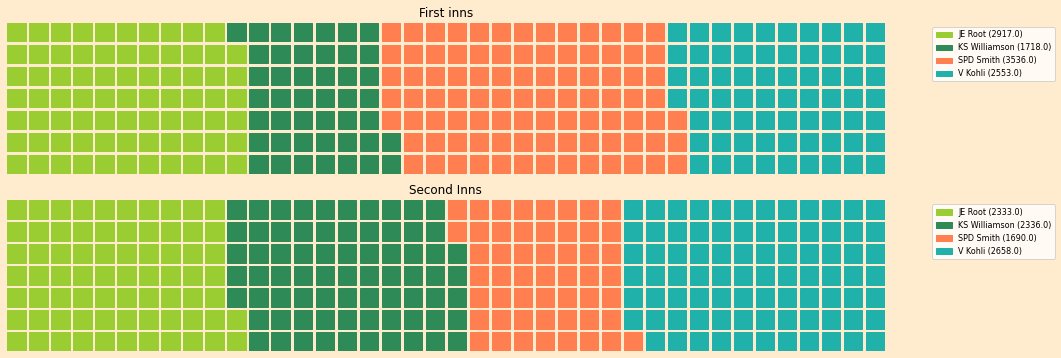

In [57]:

plt.rcParams['figure.facecolor'] = 'blanchedalmond'


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '411': {
            'values': odi_inns[1],
            'labels': [f"{k} ({v})" for k, v in newf[1].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'First inns', 'loc': 'center'}
        },
        '412': {
            'values': odi_inns[2],
            'labels': [f"{k} ({v})" for k, v in newf[2].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Second Inns', 'loc': 'center'}
        },
#         '413': {
#             'values': newf[3],            
#             'labels': [f"{k} ({v})" for k, v in newf[3].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
#             'title': {'label': 'Third Inns', 'loc': 'center'}

#         },
#         '414': {
#             'values': newf[4],
#             'labels': [f"{k} ({v})" for k, v in newf[4].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
#             'title': {'label': 'Fourth Inns', 'loc': 'center'}
#         },


    },
       rows=7,columns=40,
    colors=[  'yellowgreen', 'seagreen', 'coral', 'lightseagreen'],  
    # outside parameter applied to all subplots
    figsize=(15,10)
)
plt.show()
# plt.savefig('my.png')

In [58]:
odi_runs= odi_df.groupby(['Player'],as_index=False)['Runs'].agg('sum')

fig = px.bar(odi_runs, x="Player", y="Runs", color="Runs", title="Runs Last Decade",color_continuous_scale=px.colors.sequential.YlOrBr)

fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1000, template = 'ggplot2',
                 plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')
fig.show()

In [59]:
c = odi_df.groupby(['Opposition','Player'],as_index=False)['Runs'].agg('sum')

fig = px.bar(c, x="Player", y="Runs", color="Opposition", title="Opposition wise runs scored",color_discrete_sequence=px.colors.sequential.speed)

fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1000, template = 'ggplot2',
                 plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')
fig.show()

In [60]:
d = odi_df.groupby(['Player','Inns'],as_index=False)['Runs'].agg('sum')
fig = px.bar(d, x="Player", y="Runs", color="Inns", title="Runs Last Decade Inns wise")
# fig.update(layout_coloraxis_showscale=False)
fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1000, template = 'ggplot2',
                 plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')
fig.show()

In [61]:
fig = px.violin(odi_df, x="Player", y="Runs", color="Inns",points='all',template= "simple_white", box=True,
             title="Inns",height=700,width=1000,
             hover_data=["BF"] # add day column to hover data
            )
fig.update_layout(plot_bgcolor='white',paper_bgcolor='white')

fig.show()

In [62]:
pointpos_home = [-0.5,-0.7,-0.5,-1]
pointpos_away = [0.55,0.9,0.75,1]
show_legend = [True,False,False,False]

fig = go.Figure()

# for i in range(0,len(pd.unique(df['day']))):
fig.add_trace(go.Violin(x=smith_odi_home.Player,
                        y=smith_odi_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[0], # where to position points
                        line_color='lightseagreen',
                        showlegend=True)
         )
fig.add_trace(go.Violin(x=smith_odi_away.Player,
                        y=smith_odi_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[0],
                        line_color='mediumpurple',
                        showlegend=True)
         )
fig.add_trace(go.Violin(x=kholi_odi_home.Player,
                        y=kholi_odi_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[1], # where to position points
                        line_color='lightseagreen',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=kholi_odi_away.Player,
                        y=kholi_odi_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[1],
                        line_color='mediumpurple',
                        showlegend=False)
         )

fig.add_trace(go.Violin(x=williamson_odi_home.Player,
                        y=williamson_odi_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[2], # where to position points
                        line_color='lightseagreen',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=williamson_odi_away.Player,
                        y=williamson_odi_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[2],
                        line_color='mediumpurple',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=root_odi_home.Player,
                        y=root_odi_home.Runs,
                        legendgroup='home', scalegroup='home', name='home',
                        side='negative',
                        pointpos=pointpos_home[3], # where to position points
                        line_color='lightseagreen',
                        showlegend=False)
         )
fig.add_trace(go.Violin(x=root_odi_away.Player,
                        y=root_odi_away.Runs,
                        legendgroup='away', scalegroup='away', name='away',
                        side='positive',
                        pointpos=pointpos_away[3],
                        line_color='mediumpurple',
                        showlegend=False)
         )
#plot_bgcolor='papayawhip',paper_bgcolor='papayawhip'
# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count
fig.update_layout( template = 'simple_white',
    title_text="Runs Distribution Home/Away",title_x=0.5,height=700,width=1000,plot_bgcolor='white',paper_bgcolor='white',
    violingap=0.2, violingroupgap=0, violinmode='overlay')
fig.show()

In [63]:
kohli_yearwise_odi = yearwise_runs(kholi_odi_home,kholi_odi_away,'Kohli')
smith_yearwise_odi = yearwise_runs(smith_odi_home,smith_odi_away,'Smith' )
willam_yearwise_odi = yearwise_runs(williamson_odi_home,williamson_odi_away,'Williamson')
root_yearwise_odi = yearwise_runs(root_odi_home,root_odi_away,'Joe')
# df2= {'Year': '2011','TRuns': 0,'avg':0, 'player': "Joe"}
# root_yearwise= root_yearwise.append(df2,ignore_index = True)
# df3= {'Year': '2011','TRuns': 0,'avg':0, 'player': "Smith"}
# df4 = {'Year': '2012','TRuns': 0,'avg':0, 'player': "Smith"}
# smith_yearwise=smith_yearwise.append(df3,ignore_index = True)
# smith_yearwise=smith_yearwise.append(df4,ignore_index = True)
root_yearwise['Year'] = root_yearwise['Year'].astype('int')
smith_yearwise['Year'] = smith_yearwise['Year'].astype('int')
root_yearwise.sort_values('Year',inplace=True)
smith_yearwise.sort_values('Year',inplace=True)

In [64]:
all_players_yearwise_odi = pd.concat([kohli_yearwise_odi,smith_yearwise_odi,willam_yearwise_odi,root_yearwise_odi])

In [65]:
all_players_yearwise_odi

,Year,TRuns,avg,player
6,2011,906.0,45.300000,Kohli
10,2012,444.0,40.363636,Kohli
7,2013,1100.0,47.826087,Kohli
2,2014,1001.0,55.611111,Kohli
3,2015,307.0,27.909091,Kohli
1,2016,739.0,73.900000,Kohli
5,2017,1202.0,57.238095,Kohli
0,2018,1202.0,85.857143,Kohli
4,2019,1000.0,58.823529,Kohli
8,2020,431.0,47.888889,Kohli


In [66]:
fig = px.bar(all_players_yearwise_odi, x="Year", y="TRuns", color="player", title="ODI Yearwisr runs")

fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700,width=1400, template = 'ggplot2',
                 plot_bgcolor='blanchedalmond',paper_bgcolor='blanchedalmond')
fig.show()

In [67]:
overall_df_odi = pd.read_html('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=1;orderby=runs;size=200;spanmax1=17+May+2021;spanmin1=17+May+2011;spanval1=span;template=results;type=batting')

overall_df_odi = overall_df_odi[2]
li =  ["V Kohli (INDIA)",'JE Root (ENG)','KS Williamson (NZ)','SPD Smith (AUS)']
  
overall_df_odi =overall_df_odi[overall_df_odi.Player.isin(li)]
overall_df_odi

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,V Kohli (INDIA),2011-2021,75,74,11,4144,157*,65.77,4160,99.61,16,20,6,395,52,NaN
4,JE Root (ENG),2013-2020,77,73,10,3055,133*,48.49,3412,89.53,8,16,3,264,20,NaN
6,KS Williamson (NZ),2012-2020,70,70,5,2897,115,44.56,3582,80.87,4,22,1,253,26,NaN
17,SPD Smith (AUS),2013-2020,40,38,4,2009,164,59.08,2059,97.57,8,9,2,177,27,NaN


In [68]:
overall_df_odi['MRA'] = (overall_df_odi['100'] + overall_df_odi['50']) / overall_df_odi.Inns
overall_df_odi['conversion_rate'] = (overall_df_odi['100'] / (overall_df_odi['100']+overall_df_odi['50']))*100
overall_df_odi['tot_milestones'] = overall_df_odi['100'] + overall_df_odi['50']
overall_df_odi

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15,MRA,conversion_rate,tot_milestones
0,V Kohli (INDIA),2011-2021,75,74,11,4144,157*,65.77,4160,99.61,16,20,6,395,52,NaN,0.486486,44.444444,36
4,JE Root (ENG),2013-2020,77,73,10,3055,133*,48.49,3412,89.53,8,16,3,264,20,NaN,0.328767,33.333333,24
6,KS Williamson (NZ),2012-2020,70,70,5,2897,115,44.56,3582,80.87,4,22,1,253,26,NaN,0.371429,15.384615,26
17,SPD Smith (AUS),2013-2020,40,38,4,2009,164,59.08,2059,97.57,8,9,2,177,27,NaN,0.447368,47.058824,17


In [69]:

fig = px.bar(overall_df_odi, x='Player', y='Runs', color='Runs',color_continuous_scale=px.colors.sequential.YlOrBr,
             hover_data=['NO','SR','HS'])
fig.add_trace(go.Scatter(x=overall_df_odi.Player, y=overall_df_odi.BF/1.5, 
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=overall_df_odi.Player, y=overall_df_odi.Ave*100,
                    line_shape='linear'))

fig.add_annotation(
        x=2,
        y=10000,
        xref="x",
        yref="y",
        text='<b>'+'Average*100'+'</b>',
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="green"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="blanchedalmond",
        opacity=0.8
        )
fig.add_annotation(
        x=2,
        y=9500,
        xref="x",
        yref="y",
        text='<b>'+'Balls faced / 1.5'+'</b>',
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="blanchedalmond",
        opacity=0.8
        )


fig.update_layout(
    showlegend=False,height=600,width=1000,template='simple_white',
    plot_bgcolor="blanchedalmond",
    paper_bgcolor='blanchedalmond',
    margin=dict(t=10,l=10,b=10,r=10)
)
fig.show()

In [70]:
fig = px.bar(overall_df_odi, x='Player', y='conversion_rate', color='tot_milestones',color_continuous_scale=px.colors.sequential.speed)
fig.update_layout(
    template='simple_white',
    plot_bgcolor="white",
    paper_bgcolor='white',
)
fig.show()

In [71]:
fig = px.bar(overall_df_odi, x='Player', y='MRA', color='conversion_rate',color_continuous_scale=px.colors.sequential.YlOrBr)
fig.update_layout(
    template='ggplot2',
    plot_bgcolor="blanchedalmond",
    paper_bgcolor='blanchedalmond',
)
fig.show()